In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Getting training data and test data
# Data is in text format

In [5]:
path_train="C:/Users/Dell/Desktop/Project/Genre Classification Dataset/train_data.txt"
f2=open("train.csv","w",encoding="utf-8")
f2.write("ID,Title,Genre,Description\n")
with open(path_train,"r",encoding="utf-8") as file:
    for s in file:
        data=s.split(":::")
        ID=int(data[0])
        title=" ".join(data[1].split(","))
        genre=" ".join(data[2].split(","))
        description = " ".join(data[3].split(","))
        f2.write(f"{ID},{title},{genre},{description}")


In [6]:
# Exploring data

In [7]:
data=pd.read_csv("C:/Users/Dell/Desktop/Project/Genre Classification Dataset/train.csv",encoding="utf-8")
data.head()

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,Young Wild and Wonderful (1980),adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [8]:
data.shape

(54195, 4)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54195 entries, 0 to 54194
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54195 non-null  int64 
 1   Title        54195 non-null  object
 2   Genre        54195 non-null  object
 3   Description  54195 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [10]:
data["Genre"].value_counts()

 drama           13608
 documentary     13092
 comedy           7444
 short            5072
 horror           2203
 thriller         1591
 action           1315
 western          1031
 reality-tv        884
 family            783
 adventure         775
 music             730
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           322
 mystery           319
 musical           277
 biography         265
 history           242
 game-show         194
 news              181
 war               132
Name: Genre, dtype: int64

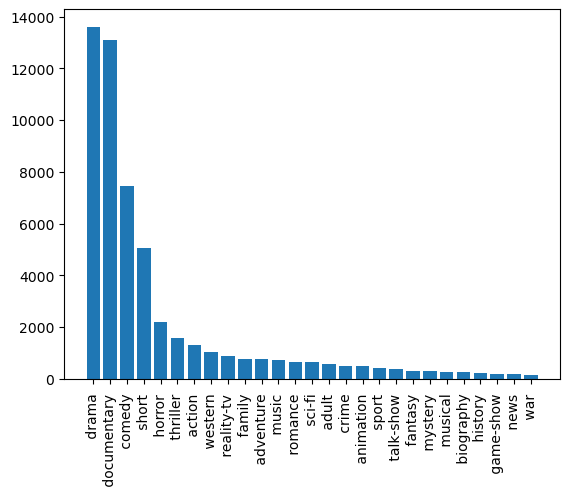

In [11]:
serie=data["Genre"].value_counts()
y=serie.values
x=serie.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

In [12]:
#the aim of this project is to built system capable of detect the genre of movie besed on its plot summary or other textual information.

In [13]:
data.isnull().sum()

ID             0
Title          0
Genre          0
Description    0
dtype: int64

In [14]:
data.duplicated().sum()

0

In [15]:
#the ID and title are meaningless attributes

In [16]:
del data["ID"]
del data["Title"]

In [17]:
#Preprocessing

In [18]:
TF_IDF=TfidfVectorizer(analyzer="word",lowercase=True,max_df=.8,ngram_range=(1,1),decode_error="ignore",encoding="utf-8")
TF_IDF.fit_transform(data["Description"])


<54195x121086 sparse matrix of type '<class 'numpy.float64'>'
	with 3535231 stored elements in Compressed Sparse Row format>

In [19]:

countvect=CountVectorizer(analyzer="word",lowercase=True,ngram_range=(1,1),stop_words=stop_words)
countvect.fit_transform(data["Description"])

<54195x120946 sparse matrix of type '<class 'numpy.int64'>'
	with 2664945 stored elements in Compressed Sparse Row format>

In [20]:
TF_IDF.get_feature_names_out().shape

(121086,)

In [21]:
Encoding=OrdinalEncoder()
Encoding.fit_transform(data[["Genre"]]).reshape(54195)
data["C_Genre"]=np.int0(Encoding.fit_transform(data[["Genre"]]).reshape(54195))
data

,Genre,Description,C_Genre
0,drama,Listening in to a conversation between his do...,8
1,thriller,A brother and sister with a past incestuous r...,24
2,adult,As the bus empties the students for their fie...,1
3,drama,To help their unemployed father make ends mee...,8
4,drama,The film's title refers not only to the un-re...,8
...,...,...,...
54190,drama,Shyam (Manoj Kumar) lives in the city with th...,8
54191,drama,When Detroit auto worker Terrence Rawlings is...,8
54192,horror,"A patient described as ""Extremely Dangerous"" ...",13
54193,comedy,Three brothers try to make ends meet when the...,5


In [27]:
preprocess=TF_IDF.fit_transform(data["Description"])
preprocess1=countvect.fit_transform(data["Description"])
#Normalization=StandardScaler(with_mean=0,with_std=1)
#preprocess1=Normalization.fit_transform(preprocess1)

In [28]:
# choosing the best model to predict the genre of films

In [29]:
# 2- Logistic regression

In [30]:
model_linearr=LogisticRegression(penalty="l2",solver="sag",multi_class="multinomial",max_iter=1000)
model_linearr.fit(preprocess1,data["C_Genre"])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', solver='sag')

In [31]:
cross_val_score(model_linearr,preprocess1,data["C_Genre"],cv=2,scoring="accuracy")

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([0.56524467, 0.5667048 ])